In [6]:
library(Seurat)
library(ggplot2)
library(patchwork)

In [7]:
mpdc <- readRDS(file = "./mPDCs.SeuratObject.Rds")
mpdc <- UpdateSeuratObject(mpdc)
mpdc

Updating from v2.X to v3.X

Validating object structure

Updating object slots

Ensuring keys are in the proper strucutre

Ensuring feature names don't have underscores or pipes

Object representation is consistent with the most current Seurat version



An object of class Seurat 
25534 features across 656 samples within 1 assay 
Active assay: RNA (25534 features, 1431 variable features)
 3 dimensional reductions calculated: PCA_coldata, pca, tSNE

In [8]:
mpdc <- RunUMAP(mpdc, reduction="pca", dims = 1:12)
mpdc

00:09:51 UMAP embedding parameters a = 0.9922 b = 1.112

00:09:51 Read 656 rows and found 12 numeric columns

00:09:51 Using Annoy for neighbor search, n_neighbors = 30

00:09:51 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

00:09:51 Writing NN index file to temp file /tmp/RtmpGqrn6H/file1278578cbe4

00:09:51 Searching Annoy index using 1 thread, search_k = 3000

00:09:51 Annoy recall = 100%

00:09:51 Commencing smooth kNN distance calibration using 1 thread

00:09:52 Initializing from normalized Laplacian + noise

00:09:52 Commencing optimization for 500 epochs, with 24868 positive edges

00:09:53 Optimization finished



An object of class Seurat 
25534 features across 656 samples within 1 assay 
Active assay: RNA (25534 features, 1431 variable features)
 4 dimensional reductions calculated: PCA_coldata, pca, tSNE, umap

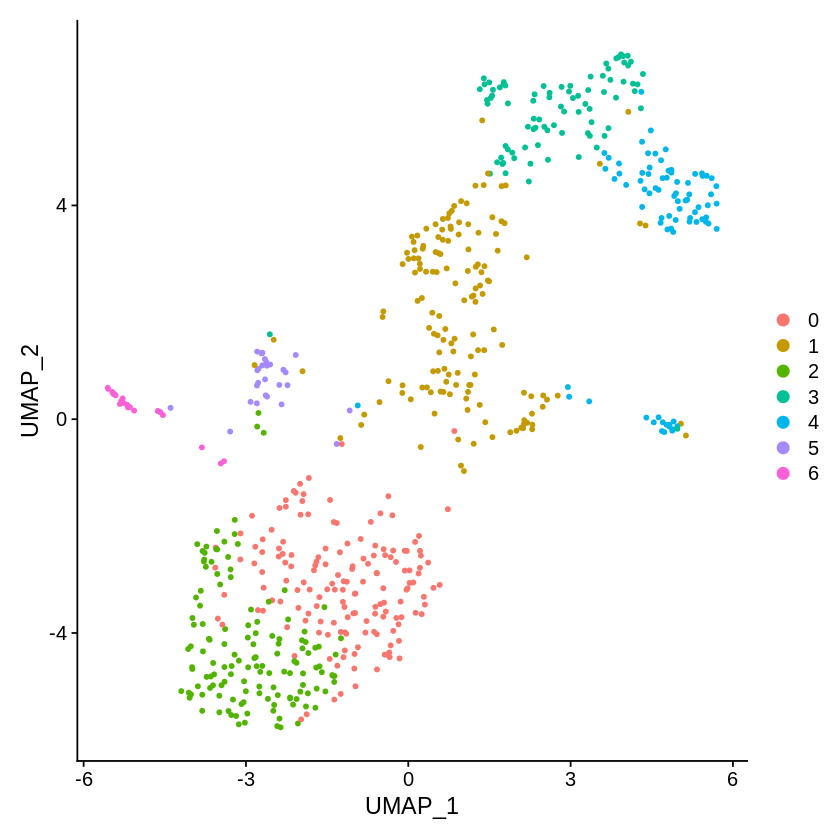

In [9]:
DimPlot(mpdc)

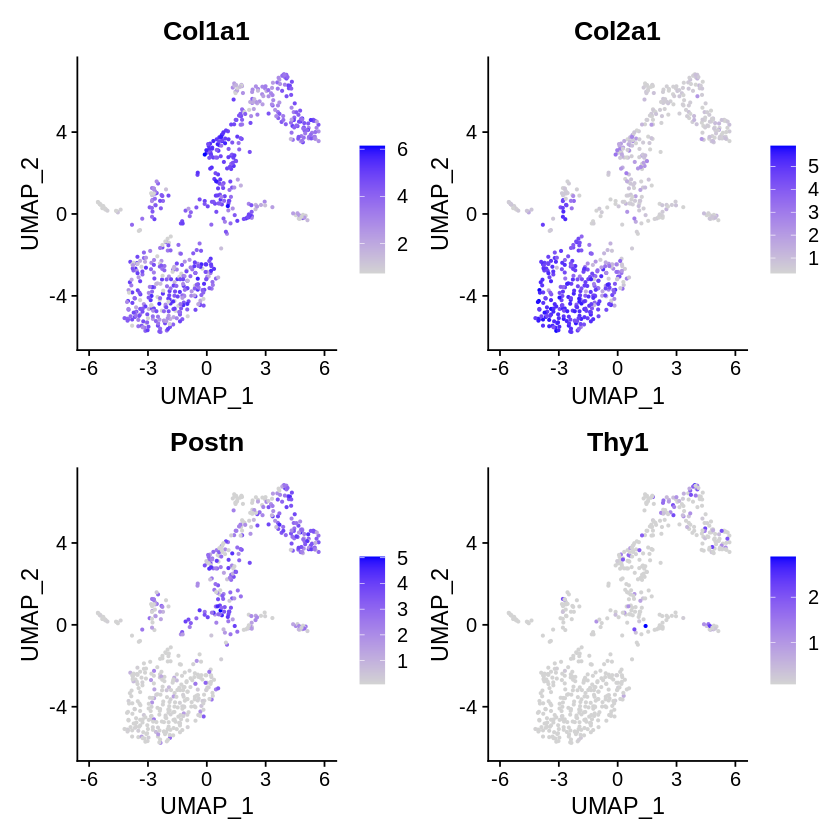

In [10]:
FeaturePlot(object = mpdc, features = c("Col1a1", "Col2a1", "Postn", "Thy1"),
            min.cutoff = "q9", pt.size = 0.5)

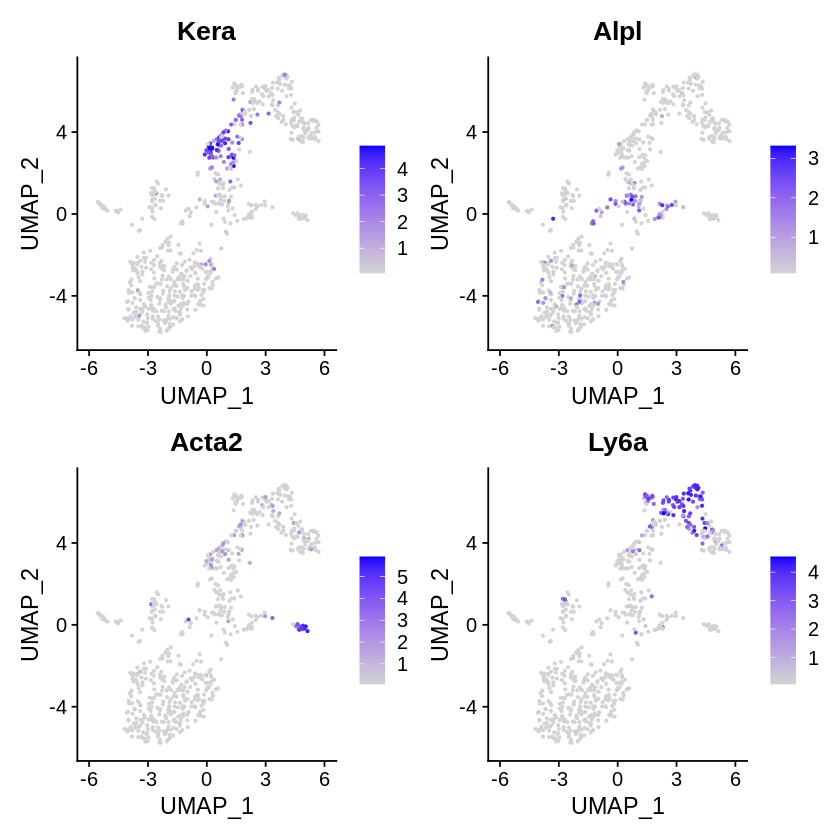

In [11]:
FeaturePlot(object = mpdc, features = c("Kera", "Alpl", "Acta2", "Ly6a"),
            min.cutoff = "q9", pt.size = 0.5)

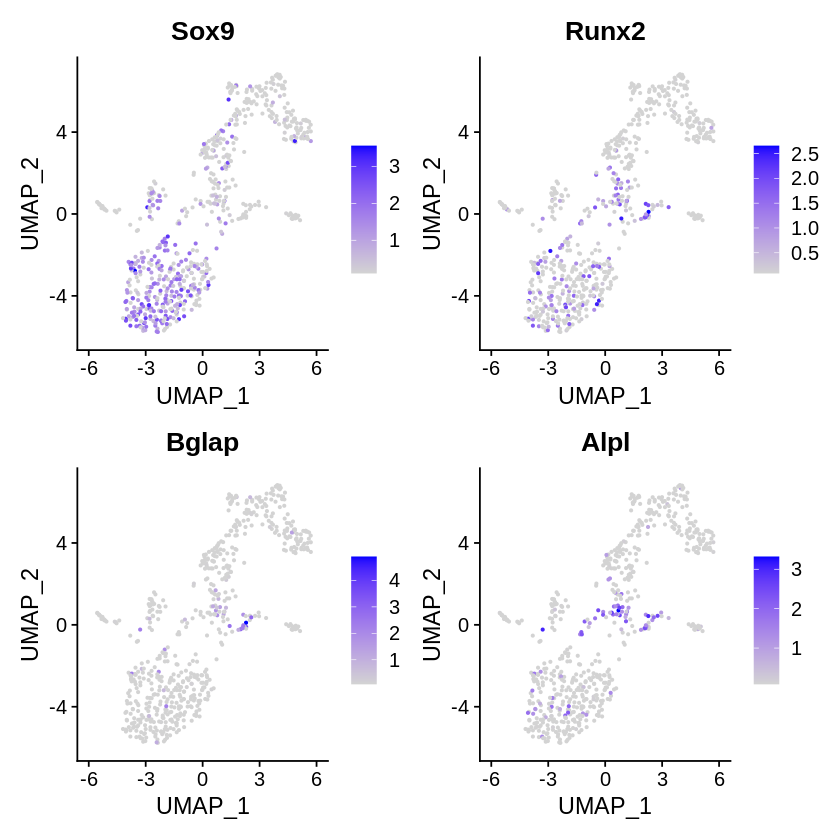

In [12]:
FeaturePlot(object = mpdc, features = c("Sox9", "Runx2", "Bglap", "Alpl"),
            min.cutoff = "q9", pt.size = 0.5)

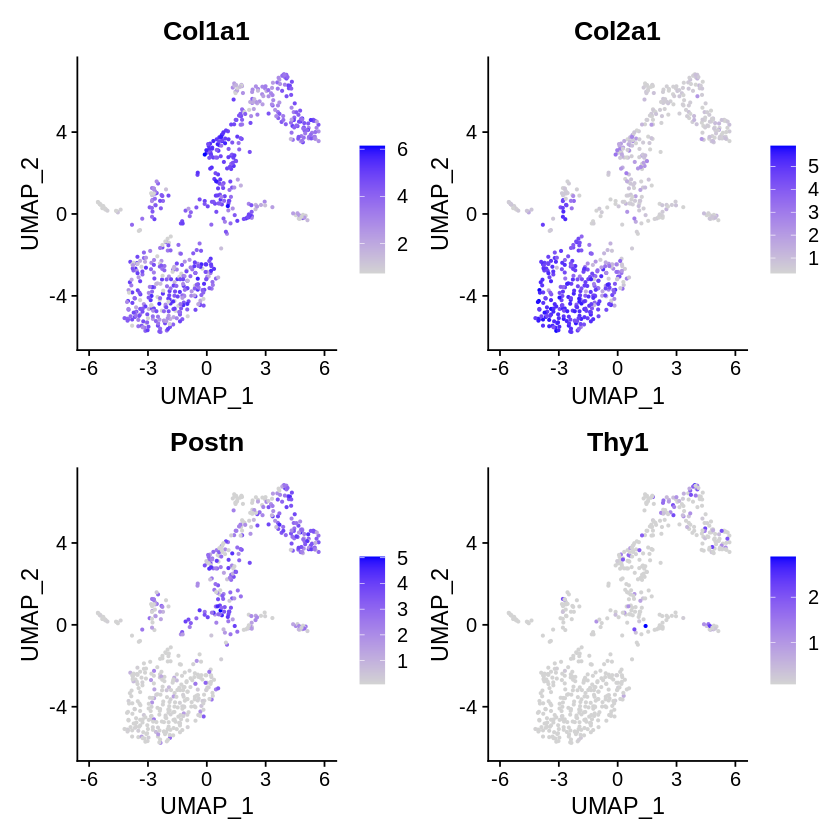

In [10]:
FeaturePlot(object = mpdc, features = c("Col1a1", "Col2a1", "Postn", "Thy1"),
            min.cutoff = "q9", pt.size = 0.5)

Warning message:
“CombinePlots is being deprecated. Plots should now be combined using the patchwork system.”


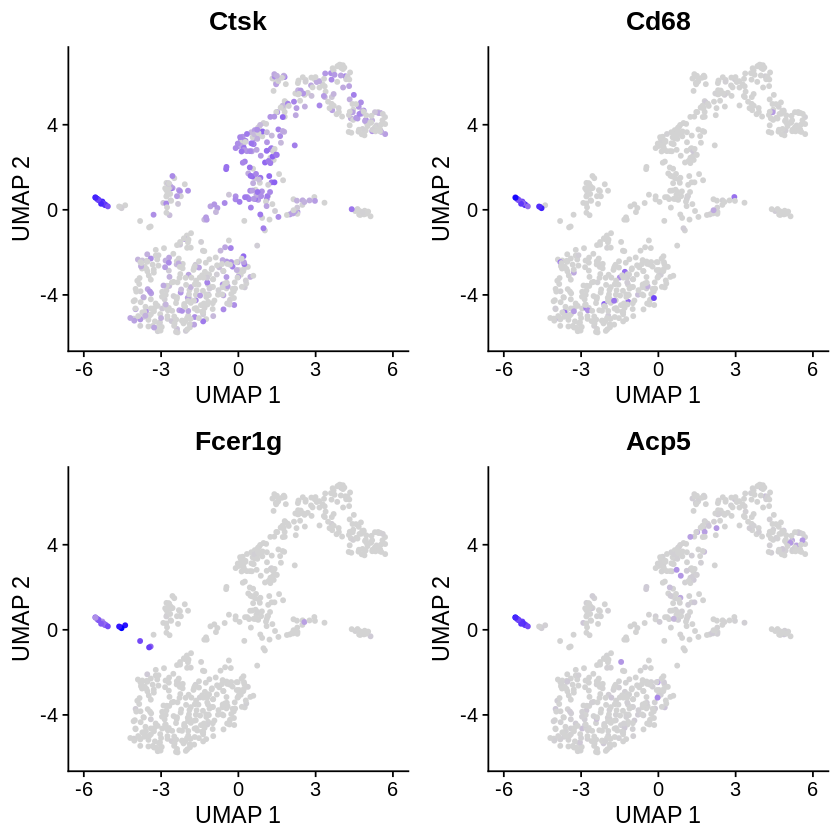

In [17]:
plots <- FeaturePlot(mpdc, features = c("Ctsk", "Cd68", "Fcer1g", "Acp5"), 
                     combine = FALSE, min.cutoff = "q9")
plots <- lapply(X = plots, FUN = function(p) p + xlab("UMAP 1") + ylab("UMAP 2") + theme(legend.position = "none") )
CombinePlots(plots = plots)

Warning message:
“CombinePlots is being deprecated. Plots should now be combined using the patchwork system.”


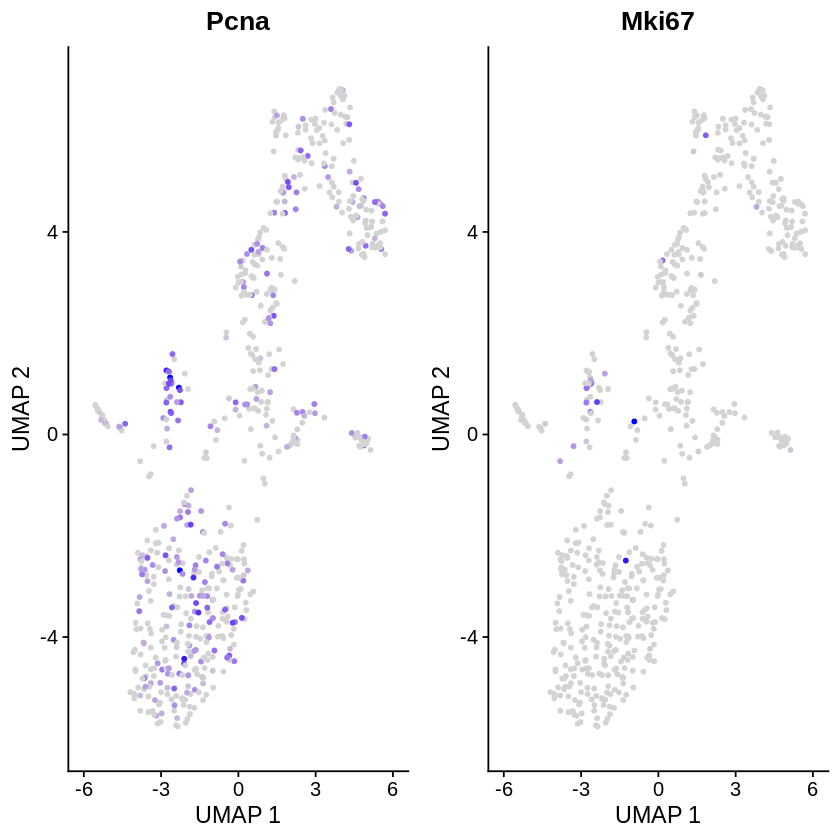

In [21]:
plots <- FeaturePlot(mpdc, features = c("Pcna", "Mki67"), 
                     combine = FALSE, min.cutoff = "q9")
plots <- lapply(X = plots, FUN = function(p) p + xlab("UMAP 1") + ylab("UMAP 2") + theme(legend.position = "none") )
CombinePlots(plots = plots)

In [18]:
new.cluster.ids <- c("Periosteal stem cell", "Osteoblast", "Periosteal stem cell", "Periosteal progenitor", "Periosteal progenitor", "Cycling cell", "Osteoclast")
names(new.cluster.ids) <- levels(mpdc)
mpdc <- RenameIdents(mpdc, new.cluster.ids)

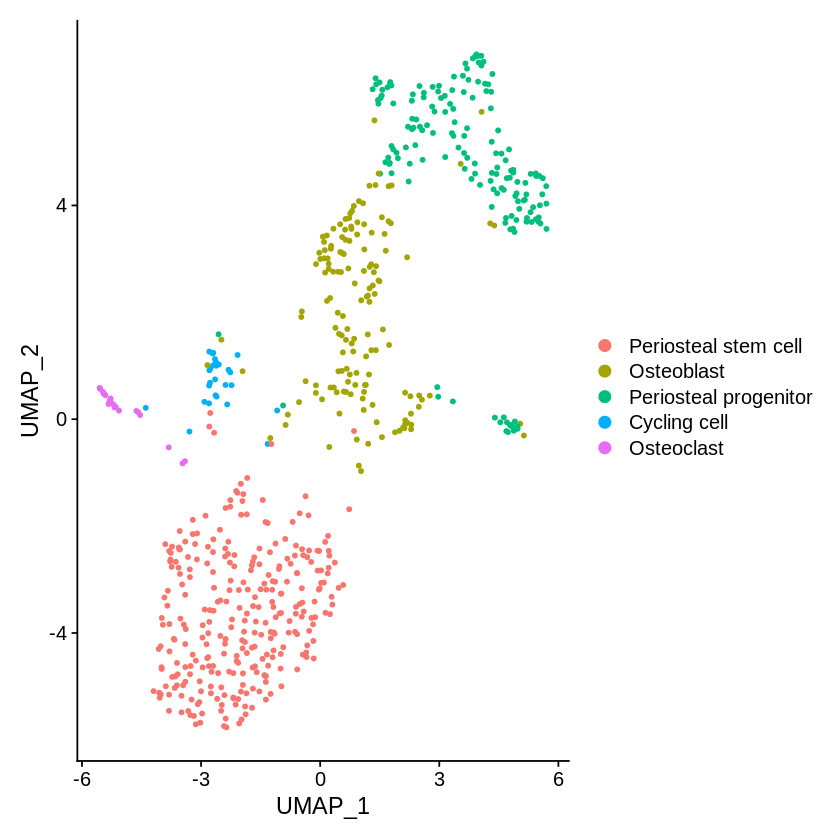

In [20]:
DimPlot(mpdc)

In [22]:
mpdc$CellType <- Idents(mpdc)

In [23]:
saveRDS(mpdc, file = "mpdc_seuratobject.Rds")